In [1]:
import time
import cv2
import math
from PIL import Image
import statistics
import collections
import numpy as np
from matplotlib import pyplot as plt
import os
from IPython.display import Image, display
import pickle
import os

In [2]:
def imshow(img):
    """ndarray 配列をインラインで Notebook 上に表示する。
    """
    ret, encoded = cv2.imencode(".jpg", img)
    display(Image(encoded))


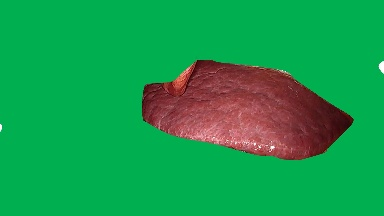

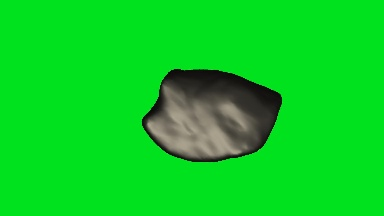

In [3]:
IMG_SIZE = (384, 216)
# １枚目の画像を読み込む
img1 = cv2.imread("image1.jpg")
# ２枚目の画像を読み込む
img2 = cv2.imread("image2.jpg") 
img1 = cv2.resize(img1, IMG_SIZE)
img2 = cv2.resize(img2, IMG_SIZE)
imshow(img1)
imshow(img2)

In [4]:
af_x = 0
af_y = 0
m = np.float32([[1, af_x, 0], [af_y, 1, 0]])
im = img2
h, w, ch = img2.shape
img2_affin = cv2.warpAffine(im, m, (w, h), borderValue=(0, 225, 0))
cv2.imwrite("AffinImages/0.jpg",img2_affin)

af_x = 0.1
af_y = 0
m = np.float32([[1, af_x, -10], [af_y, 1, 0]])
img2_affin = cv2.warpAffine(im, m, (w, h), borderValue=(0, 225, 0))
cv2.imwrite("AffinImages/x1.jpg",img2_affin)


af_x = 0.2
af_y = 0
m = np.float32([[1, af_x, -20], [af_y, 1, 0]])
img2_affin = cv2.warpAffine(im, m, (w, h), borderValue=(0, 225, 0))
cv2.imwrite("AffinImages/x2.jpg",img2_affin)

af_x = 0.3
af_y = 0
m = np.float32([[1, af_x, -30], [af_y, 1, 0]])
img2_affin = cv2.warpAffine(im, m, (w, h), borderValue=(0, 225, 0))
cv2.imwrite("AffinImages/x3.jpg",img2_affin)

af_x = 0.4
af_y = 0
m = np.float32([[1, af_x, -40], [af_y, 1, 0]])
img2_affin = cv2.warpAffine(im, m, (w, h), borderValue=(0, 225, 0))
cv2.imwrite("AffinImages/x4.jpg",img2_affin)


af_x = -0.1
af_y = 0
m = np.float32([[1, af_x, 10], [af_y, 1, 0]])
img2_affin = cv2.warpAffine(im, m, (w, h), borderValue=(0, 225, 0))
cv2.imwrite("AffinImages/x-1.jpg",img2_affin)

af_x = -0.2
af_y = 0
m = np.float32([[1, af_x, 20], [af_y, 1, 0]])
img2_affin = cv2.warpAffine(im, m, (w, h), borderValue=(0, 225, 0))
cv2.imwrite("AffinImages/x-2.jpg",img2_affin)

af_x = -0.3
af_y = 0
m = np.float32([[1, af_x, 30], [af_y, 1, 0]])
img2_affin = cv2.warpAffine(im, m, (w, h), borderValue=(0, 225, 0))
#cv2.imwrite("Affin/x-3.jpg",img2_affin)

af_x = -0.4
af_y = 0
m = np.float32([[1, af_x, 40], [af_y, 1, 0]])
img2_affin = cv2.warpAffine(im, m, (w, h), borderValue=(0, 225, 0))
cv2.imwrite("AffinImages/x-4.jpg",im)

af_x = 0
af_y = 0.1
m = np.float32([[1, af_x, 0], [af_y, 1, -25]])
img2_affin = cv2.warpAffine(im, m, (w, h), borderValue=(0, 225, 0))
cv2.imwrite("AffinImages/y1.jpg",img2_affin)

af_x =  0
af_y = 0.2
m = np.float32([[1, af_x, 0], [af_y, 1, -50]])
img2_affin = cv2.warpAffine(im, m, (w, h), borderValue=(0, 225, 0))
cv2.imwrite("AffinImages/y2.jpg",img2_affin)


af_x =  0
af_y =  0.3
m = np.float32([[1, af_x, 0], [af_y, 1, -75]])
img2_affin = cv2.warpAffine(im, m, (w, h), borderValue=(0, 225, 0))
cv2.imwrite("AffinImages/y3.jpg",img2_affin)


af_x =  0
af_y = -0.1
m = np.float32([[1, af_x, 0], [af_y, 1, 25]])
img2_affin = cv2.warpAffine(im, m, (w, h), borderValue=(0, 225, 0))
cv2.imwrite("AffinImages/y-1.jpg",img2_affin)

af_x =  0
af_y = -0.2
m = np.float32([[1, af_x, 0], [af_y, 1, 50]])
img2_affin = cv2.warpAffine(im, m, (w, h), borderValue=(0, 225, 0))
cv2.imwrite("AffinImages/y-2.jpg",img2_affin)


af_x =  0
af_y = -0.3
m = np.float32([[1, af_x, 0], [af_y, 1, 75]])
img2_affin = cv2.warpAffine(im, m, (w, h), borderValue=(0, 225, 0))
cv2.imwrite("AffinImages/y-3.jpg",img2_affin)



True

In [5]:
IMG_DIR =  "./AffinImages/"
files = os.listdir(IMG_DIR)
mylistfig = []
mylistret = []

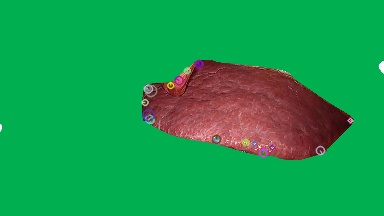

In [6]:
# BFMatcherオブジェクトの生成
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
detector = cv2.AKAZE_create()
(target_kp, target_des) = detector.detectAndCompute(img1, None)
extraceted_img = cv2.drawKeypoints(img1, target_kp, None, flags=4)
imshow(extraceted_img)

In [7]:
for file in files:
    comparing_img_path = IMG_DIR + file
    comparing_img = cv2.imread(comparing_img_path, cv2.IMREAD_GRAYSCALE)
    comparing_img = cv2.resize(comparing_img, IMG_SIZE)
    (comparing_kp, comparing_des) = detector.detectAndCompute(comparing_img, None)
    #result = cv2.matchTemplate(target_img, comparing_img, cv2.TM_CCORR_NORMED)
    matches = bf.match(target_des, comparing_des)
    dist = [m.distance for m in matches]
    ret = sum(dist) / len(dist)
    #print(file, ret)
    mylistfig.append(file)
    mylistret.append(ret)
    #template.append(result)

In [8]:
n = mylistret.index(min(mylistret))
min(mylistret)
mylistfig[n]
result_img_path = IMG_DIR + mylistfig[n]
min(mylistret),mylistfig[n], result_img_path

(117.77272727272727, 'y-2.jpg', './AffinImages/y-2.jpg')

In [9]:
# マッチした画像を読み込む
img2 = cv2.imread(result_img_path) 
img1 = cv2.resize(img1, IMG_SIZE)
img2 = cv2.resize(img2, IMG_SIZE)

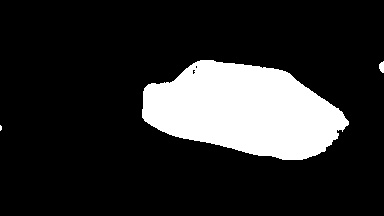

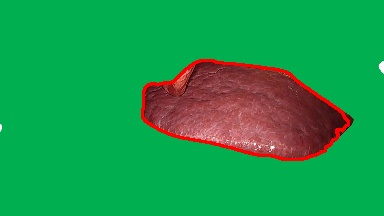

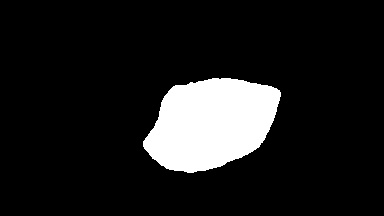

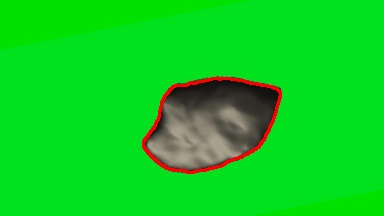

In [10]:
def get_contours(img):
    # HSV 色空間に変換する。
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # 2値化する。
    bin_img = cv2.inRange(hsv, (0, 0, 0), (255, 200, 255))

    # 輪郭を滑らかにする。
    bin_img = cv2.medianBlur(bin_img, 5)
    imshow(bin_img)

    # 輪郭を抽出する。
    contours, hierarchy = cv2.findContours(
        bin_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    # 面積が小さい輪郭は除去する。
    contours = list(filter(lambda x: cv2.contourArea(x) > 100, contours))

    # 輪郭抽出の結果を描画する。
    dst = cv2.drawContours(img.copy(), contours, -1, color=(0, 0, 255), thickness=2)
    imshow(dst)

    return contours

train_contours = get_contours(img1)
query_contours = get_contours(img2)

train_obj = {"contour": train_contours[0]}
query_obj = {"contour": query_contours[0]}

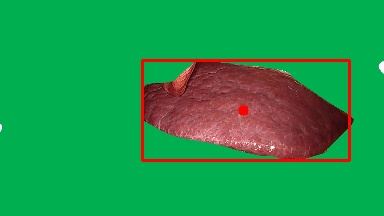

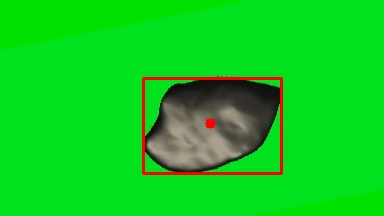

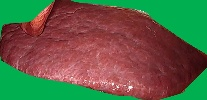

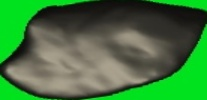

11.309932708740234
11.768289566040039


array([[138, 162],
       [159,  62],
       [281,  88],
       [260, 188]], dtype=int64)

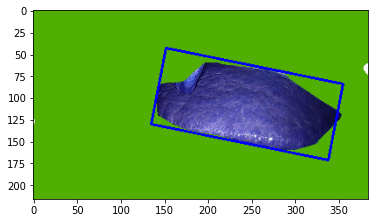

In [11]:
def get_rect(contour):
    # 輪郭の外接矩形を取得する。
    x, y, w, h = cv2.boundingRect(contour)
    # 輪郭のモーメントを計算する。
    M = cv2.moments(contour)
    # モーメントから重心を計算する。
    cx = M["m10"] / M["m00"]
    cy = M["m01"] / M["m00"]

    return {"tl": (x, y), "br": (x + w, y + h), "center": (cx, cy)}


def to_int_tuple(pt):
    return tuple(int(x) for x in pt)


train_obj.update(get_rect(train_obj["contour"]))
query_obj.update(get_rect(query_obj["contour"]))
dst1 = img1.copy()
dst2 = img2.copy()
cv2.rectangle(dst1, train_obj["tl"], train_obj["br"], color=(0, 0, 255), thickness=2)
cv2.circle(dst1, to_int_tuple(train_obj["center"]), 5, color=(0, 0, 255), thickness=-1)
cv2.rectangle(dst2, query_obj["tl"], query_obj["br"], color=(0, 0, 255), thickness=2)
cv2.circle(dst2, to_int_tuple(query_obj["center"]), 5, color=(0, 0, 255), thickness=-1)
img1_cropped = img1[train_obj["tl"][1]:train_obj["br"][1], train_obj["tl"][0]:train_obj["br"][0], :]
img2_cropped = img2[query_obj["tl"][1]:query_obj["br"][1], query_obj["tl"][0]:query_obj["br"][0], :]
IMG_SIZE2 = ( train_obj["br"][0] - train_obj["tl"][0],  train_obj["br"][1] - train_obj["tl"][1])
img2_resized = cv2.resize(img2_cropped, IMG_SIZE2)
imshow(dst1)
imshow(dst2)
imshow(img1_cropped)
imshow(img2_resized)


rect1 = cv2.minAreaRect(train_contours[0])
box1 = cv2.boxPoints(rect1)
box1 = np.int0(box1)
img1_angle = cv2.drawContours(img1,[box1],0,(0,0,255),2)
plt.imshow(img1_angle)
print(rect1[2])
rect1
box1

rect2 = cv2.minAreaRect(query_contours[0])
box2 = cv2.boxPoints(rect2)
box2 = np.int0(box2)
img2_angle = cv2.drawContours(img2,[box2],0,(0,0,255),2)
#plt.imshow(img2_angle)
print(rect2[2])
#rect2
box2

True

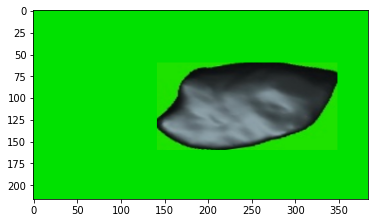

In [12]:
m = np.float32([[1, 0, train_obj["tl"][0]], [0, 1, train_obj["tl"][1]]])
im = img2_resized
h, w, ch = img1.shape
im_trasformed = cv2.warpAffine(im, m, (w, h), borderValue=(0, 225, 0))
plt.imshow(im_trasformed)
#検出結果を描画した画像を出力する
cv2.imwrite("im_trasformed.jpg",im_trasformed)
#M = cv2.getRotationMatrix2D(center= train_obj["center"], angle=250, scale=1)
#dst = cv2.warpAffine(im_trasformed, M, dsize=(w, h))
#imshow(dst)
#img = cv2.addWeighted(img1, 0.5, dst, 0.1, 0)
#imshow(img)

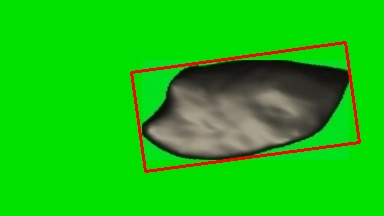

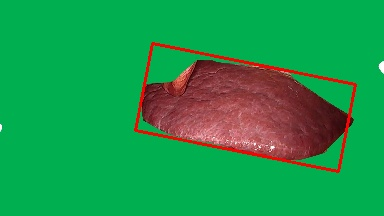

11.309932708740234
82.23483276367188


In [13]:
threshold=100
fname = "./im_trasformed.jpg"
img_color= cv2.imread(fname) 
img_gray = cv2.imread(fname,cv2.IMREAD_GRAYSCALE) 
img_blur = cv2.blur(img_gray,(9,9)) 
# オブジェクトimg_blurを閾値threshold(220)で反転二値化しimg_binaryに代入
ret, img_binary= cv2.threshold(img_blur, threshold, 255, cv2.THRESH_BINARY_INV) 
# img_binaryを輪郭抽出
contours, hierarchy = cv2.findContours(img_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
rect2 = cv2.minAreaRect(contours[0])
box2 = cv2.boxPoints(rect2)
box2 = np.int0(box2)
img2_trans_angle = cv2.drawContours(img_color,[box2],0,(0,0,255),2)
imshow(img2_trans_angle)

rect1 = cv2.minAreaRect(train_contours[0])
box1 = cv2.boxPoints(rect1)
box1 = np.int0(box1)
img1_angle = cv2.drawContours(img1,[box1],0,(0,0,255),2)
imshow(img1_angle)
print(rect1[2])
print(rect2[2])

In [14]:
angle =  -((90- rect2[2]) + rect1[2])
angle

-19.07509994506836

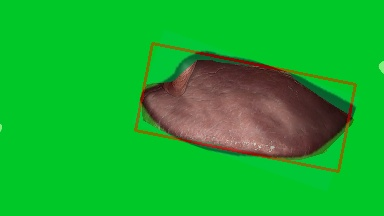

In [16]:
M = cv2.getRotationMatrix2D(center= train_obj["center"], angle=angle, scale=1)
im_trasformed2 = cv2.warpAffine(im_trasformed, M, dsize=(w, h), borderValue=(0, 225, 0))
#imshow(im_trasformed2)
cv2.imwrite("im_trasformed2.jpg",im_trasformed2)
img = cv2.addWeighted(img1, 0.5, im_trasformed2, 0.5, 0)
cv2.imwrite("im_augmented.jpg",img)
imshow(img)

In [ ]:
import cv2
import numpy as np
import glob
#画像保存場所を指定⇒フォイル名一覧を取得
pic_dir='affin/pic*'
pic_names=glob.glob(pic_dir)
#データセットの構築
data_set=[]
for i in range(len(pic_names)):
    pic_data=cv2.imread(pic_names[i],cv2.IMREAD_GRAYSCALE)
    data_set.append(pic_data)
data_set=np.array(data_set)

In [ ]:
af_x = 0
af_y = 0
m = np.float32([[1, af_x, 0], [af_y, 1, 0]])
im = im_trasformed2
h, w, ch = im_trasformed2.shape
im_trasformed3 = cv2.warpAffine(im, m, (w, h), borderValue=(0, 225, 0))
plt.imshow(im_trasformed3)
cv2.imwrite("Affin/im_trasformed3_0.jpg",im_trasformed3)

af_x = 0.1
af_y = 0
m = np.float32([[1, af_x, -10], [af_y, 1, 0]])
im = im_trasformed2
h, w, ch = im_trasformed2.shape
im_trasformed3 = cv2.warpAffine(im, m, (w, h), borderValue=(0, 225, 0))
plt.imshow(im_trasformed3)
cv2.imwrite("Affin/im_trasformed3_1.jpg",im_trasformed3)

af_x = 0.2
af_y = 0
m = np.float32([[1, af_x, -20], [af_y, 1, 0]])
im = im_trasformed2
h, w, ch = im_trasformed2.shape
im_trasformed3 = cv2.warpAffine(im, m, (w, h), borderValue=(0, 225, 0))
plt.imshow(im_trasformed3)
cv2.imwrite("Affin/im_trasformed3_2.jpg",im_trasformed3)

af_x = 0.3
af_y = 0
m = np.float32([[1, af_x, -30], [af_y, 1, 0]])
im = im_trasformed2
h, w, ch = im_trasformed2.shape
im_trasformed3 = cv2.warpAffine(im, m, (w, h), borderValue=(0, 225, 0))
plt.imshow(im_trasformed3)
cv2.imwrite("Affin/im_trasformed3_3.jpg",im_trasformed3)

af_x = 0.4
af_y = 0
m = np.float32([[1, af_x, -40], [af_y, 1, 0]])
im = im_trasformed2
h, w, ch = im_trasformed2.shape
im_trasformed3 = cv2.warpAffine(im, m, (w, h), borderValue=(0, 225, 0))
plt.imshow(im_trasformed3)
cv2.imwrite("Affin/im_trasformed3_4.jpg",im_trasformed3)


af_x = -0.1
af_y = 0
m = np.float32([[1, af_x, 10], [af_y, 1, 0]])
im = im_trasformed2
h, w, ch = im_trasformed2.shape
im_trasformed3 = cv2.warpAffine(im, m, (w, h), borderValue=(0, 225, 0))
plt.imshow(im_trasformed3)
cv2.imwrite("Affin/im_trasformed3_5.jpg",im_trasformed3)

af_x = -0.2
af_y = 0
m = np.float32([[1, af_x, 20], [af_y, 1, 0]])
im = im_trasformed2
h, w, ch = im_trasformed2.shape
im_trasformed3 = cv2.warpAffine(im, m, (w, h), borderValue=(0, 225, 0))
plt.imshow(im_trasformed3)
cv2.imwrite("Affin/im_trasformed3_6.jpg",im_trasformed3)


af_x = -0.3
af_y = 0
m = np.float32([[1, af_x, 30], [af_y, 1, 0]])
im = im_trasformed2
h, w, ch = im_trasformed2.shape
im_trasformed3 = cv2.warpAffine(im, m, (w, h), borderValue=(0, 225, 0))
plt.imshow(im_trasformed3)
cv2.imwrite("Affin/im_trasformed3_7.jpg",im_trasformed3)

af_x = -0.4
af_y = 0
m = np.float32([[1, af_x, 40], [af_y, 1, 0]])
im = im_trasformed2
h, w, ch = im_trasformed2.shape
im_trasformed3 = cv2.warpAffine(im, m, (w, h), borderValue=(0, 225, 0))
plt.imshow(im_trasformed3)
cv2.imwrite("Affin/im_trasformed3_8.jpg",im_trasformed3)

af_x = 0
af_y = 0.1
m = np.float32([[1, af_x, 0], [af_y, 1,-25]])
im = im_trasformed2
h, w, ch = im_trasformed2.shape
im_trasformed3 = cv2.warpAffine(im, m, (w, h), borderValue=(0, 225, 0))
plt.imshow(im_trasformed3)
cv2.imwrite("Affin/im_trasformed3_9.jpg",im_trasformed3)

af_x =  0
af_y = 0.2
m = np.float32([[1, af_x, 0], [af_y, 1, -50]])
im = im_trasformed2
h, w, ch = im_trasformed2.shape
im_trasformed3 = cv2.warpAffine(im, m, (w, h), borderValue=(0, 225, 0))
plt.imshow(im_trasformed3)
cv2.imwrite("Affin/im_trasformed3_10.jpg",im_trasformed3)

af_x =  0
af_y =  0.3
m = np.float32([[1, af_x, 0], [af_y, 1, -75]])
im = im_trasformed2
h, w, ch = im_trasformed2.shape
im_trasformed3 = cv2.warpAffine(im, m, (w, h), borderValue=(0, 225, 0))
plt.imshow(im_trasformed3)
cv2.imwrite("Affin/im_trasformed3_11.jpg",im_trasformed3)

af_x =  0
af_y = -0.1
m = np.float32([[1, af_x, 0], [af_y, 1, 25]])
im = im_trasformed2
h, w, ch = im_trasformed2.shape
im_trasformed3 = cv2.warpAffine(im, m, (w, h), borderValue=(0, 225, 0))
plt.imshow(im_trasformed3)
cv2.imwrite("Affin/im_trasformed3_12.jpg",im_trasformed3)

af_x =  0
af_y = -0.2
m = np.float32([[1, af_x, 0], [af_y, 1, 50]])
im = im_trasformed2
h, w, ch = im_trasformed2.shape
im_trasformed3 = cv2.warpAffine(im, m, (w, h), borderValue=(0, 225, 0))
plt.imshow(im_trasformed3)
cv2.imwrite("Affin/im_trasformed3_13.jpg",im_trasformed3)


af_x =  0
af_y = -0.3
m = np.float32([[1, af_x, 0], [af_y, 1, 75]])
im = im_trasformed2
h, w, ch = im_trasformed2.shape
im_trasformed3 = cv2.warpAffine(im, m, (w, h), borderValue=(0, 225, 0))
plt.imshow(im_trasformed3)
cv2.imwrite("Affin/im_trasformed3_14.jpg",im_trasformed3)

In [ ]:
input_path = "im_trasformed2.jpg"
img = cv2.imread(input_path)


h, w = img.shape[:2]

shear = 160
src = np.array([[0.0, 0.0],[0.0, 1.0],[1.0, 0.0]], np.float32)
dts = src.copy()
dts[:,0] += (shear / h * (h - src[:,1])).astype(np.float32)
M = cv2.getAffineTransform(src,dts)

img = cv2.warpAffine(img, M, (w, h))

plt.imshow(img)

In [ ]:
img = cv2.addWeighted(img1, 0.5, im_trasformed3, 0.5, 0)
imshow(img)

In [ ]:
img = cv2.addWeighted(img1, 0.5, im_trasformed2, 0.5, 0)
imshow(img)

In [ ]:
import numpy as np
import cv2 as cv

float_img = cv.imread("./im_trasformed.jpg", cv.IMREAD_GRAYSCALE)
ref_img = cv.imread('C:/Users/a00m0/OneDrive/Nishimask/images1/image.jpg', cv.IMREAD_GRAYSCALE)

akaze = cv.AKAZE_create()
float_kp, float_des = akaze.detectAndCompute(float_img, None)
ref_kp, ref_des = akaze.detectAndCompute(ref_img, None)

bf = cv.BFMatcher()
matches = bf.knnMatch(float_des, ref_des, k=2)

plt.imshow(float_img)
plt.imshow(ref_img)

In [ ]:
good_matches = []
for m, n in matches:
    if m.distance < 0.95 * n.distance:
        good_matches.append([m])

In [ ]:
# 適切なキーポイントを選択
ref_matched_kpts = np.float32(
    [float_kp[m[0].queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
sensed_matched_kpts = np.float32(
    [ref_kp[m[0].trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

In [ ]:
# ホモグラフィを計算
H, status = cv.findHomography(
    ref_matched_kpts, sensed_matched_kpts, cv.RANSAC, 5.0)

In [ ]:
# 画像を変換
warped_image = cv.warpPerspective(
    float_img, H, (float_img.shape[1], float_img.shape[0]))

plt.imshow(warped_image)
cv.imwrite('warped.jpg', warped_image)

In [ ]:
MIN_MATCH_COUNT = 10
img1 = cv.imread("./im_trasformed.jpg", cv.IMREAD_GRAYSCALE)
img2 = cv.imread('C:/Users/a00m0/OneDrive/Nishimask/images1/image.jpg', cv.IMREAD_GRAYSCALE)
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 1 *n.distance:
        good.append(m)
len(good)

In [ ]:
src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)   
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
matchesMask = mask.ravel().tolist() 
h,w = img1.shape
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,M)
img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

In [ ]:
img1.shape

In [ ]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.imshow(img3, 'gray'),plt.show()

In [ ]:
# AKAZE検出器の生成
akaze = cv2.AKAZE_create() 
# gray1にAKAZEを適用、特徴点を検出
kp1, des1 = akaze.detectAndCompute(gray1,None) 
# gray2にAKAZEを適用、特徴点を検出
kp2, des2 = akaze.detectAndCompute(gray2,None) 

# BFMatcherオブジェクトの生成
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptorsを生成
matches = bf.match(des1, des2)

# matchesをdescriptorsの似ている順にソートする 
matches = sorted(matches, key = lambda x:x.distance)

# 検出結果を描画する
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

#検出結果を描画した画像を出力する
cv2.imwrite("result8.png",img3)

In [ ]:
##cv2.imshow("result.png",img3)

In [ ]:
def get_contours(img):
    # HSV 色空間に変換する。
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # 2値化する。
    bin_img = cv2.inRange(hsv, (0, 0, 0), (255, 200, 255))

    # 輪郭を滑らかにする。
    bin_img = cv2.medianBlur(bin_img, 5)
    imshow(bin_img)

    # 輪郭を抽出する。
    contours, hierarchy = cv2.findContours(
        bin_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    # 面積が小さい輪郭は除去する。
    contours = list(filter(lambda x: cv2.contourArea(x) > 100, contours))

    # 輪郭抽出の結果を描画する。
    dst = cv2.drawContours(img.copy(), contours, -1, color=(0, 0, 255), thickness=2)
    imshow(dst)

    return contours


In [ ]:
# 画像を読み込む。
train_img = cv2.imread(target_img_path)  # 探したい物体
query_img = cv2.imread(result_img_path)

In [ ]:
# 輪郭を抽出する。
train_contours = get_contours(train_img)
query_contours = get_contours(query_img)

In [ ]:
# 検出結果を格納するオブジェクト
train_obj = {"contour": train_contours[0]}
query_objs = [{"contour": x} for x in query_contours]

# 各物体のマスクを作成する。
for obj in query_objs:
    # 輪郭内部を255、それ以外を0としたマスク画像を作成する。
    mask = np.zeros(train_img.shape[:2], dtype=np.uint8)
    cv2.drawContours(mask, [obj["contour"]], -1, color=255, thickness=-1)
    imshow(mask)

    obj["mask"] = mask

In [ ]:
# OBR 特徴量検出器を作成する。
#detector = cv2.ORB_create()
detector = cv2.AKAZE_create()
# 探したい物体の特徴点及び特徴量記述子を計算する。
train_kp, train_desc = detector.detectAndCompute(train_img, None)

# 検出対象の画像の物体の特徴点及び特徴量記述子を計算する。
for obj in query_objs:
    obj["kp"], obj["desc"] = detector.detectAndCompute(query_img, obj["mask"])

In [ ]:
# マッチング器を作成する。
bf = cv2.BFMatcher(cv2.NORM_HAMMING)

for obj in query_objs:
    # 特徴点マッチングを行う。
    matches = bf.knnMatch(obj["desc"], train_desc, k=2)

    # レシオテストを行う。
    good_matches = []
    for first, second in matches:
        if first.distance < second.distance * 0.9:
            good_matches.append(first)

    # マッチング結果を描画する。
    dst = cv2.drawMatches(query_img, obj["kp"], train_img, train_kp, good_matches, None)
    imshow(dst)

    if len(good_matches) > 100:
        # 十分な数のマッチングが存在する場合、同一物体と判定する。
        obj["is_target"] = True

        # マッチした特徴点を格納する。
        obj["match_query_kp"] = np.array(
            [obj["kp"][x.queryIdx].pt for x in good_matches]
        )
        obj["match_train_kp"] = np.array(
            [train_kp[x.trainIdx].pt for x in good_matches]
        )
    else:
        obj["is_target"] = False

# 検出できた物体だけ残す
query_objs = [x for x in query_objs if x["is_target"]]

In [ ]:
def calc_pose(query_kp, train_kp):
    query_kp = np.reshape(query_kp, (-1, 1, 2))
    train_kp = np.reshape(train_kp, (-1, 1, 2))

    # ホモグラフィー行列を求める。
    A, inliers = cv2.estimateAffinePartial2D(train_kp, query_kp)

    # 行列から平行移動量を求める。
    M = A[:2, :2]
    t = A[:, 2]
    # 行列から回転角度を求める。
    degree = np.rad2deg(-np.arctan2(A[0, 1], A[0, 0]))

    return {"angle": degree, "M": M, "t": t}


for obj in query_objs:
    obj.update(calc_pose(obj["match_query_kp"], obj["match_train_kp"]))

In [ ]:
img = cv2.addWeighted(train_img, 0.5, query_img, 0.5, 0)
imshow(img)

In [ ]:
obj

In [ ]:
# 平行移動及び回転角度を描画する。
img = cv2.addWeighted(train_img, 0.5, query_img, 0.5, 0)

for obj in query_objs:
    src = np.array(train_obj["center"])

    # 移動前の点に推定したアフィン変換 M x + b を適用する。
    dst = obj["M"] @ src + obj["t"]

    # アフィン変換後の点及び回転量を描画して、合っていることを確かめる。

    # アフィン変換後の点を描画する。
    cv2.arrowedLine(
        img, to_int_tuple(src), to_int_tuple(dst), color=(0, 0, 255), thickness=2
    )

    # 回転量を描画する。
    cv2.ellipse(
        img,
        to_int_tuple(dst),
        (20, 20),
        angle=0,
        startAngle=0,
        endAngle=obj["angle"],
        color=(0, 0, 0),
        thickness=-1,
    )
imshow(img)

In [ ]:
query_objs["angle"]

In [ ]:
# １枚目の画像を読み込む
img1 =  cv2.imread(target_img_path)
# ２枚目の画像を読み込む
img2 = cv2.imread("C:/Users/a00m0/OneDrive/Nishimask/images/0099.jpg") 
img1 = cv2.resize(img1, IMG_SIZE)
img2 = cv2.resize(img2, IMG_SIZE)
#img2_resized
#img1_cropped

In [ ]:
# A-KAZE検出器の生成
akaze = cv2.AKAZE_create()

In [ ]:
# 画像を読込、特徴量を計算
# kp=keypoints(特徴点抽出), des=descriptors(特徴点描画)
# detectAndCompute() => (kp:特徴点の一覧, des:各特徴点の特徴量記述子)  のタプルになります。
kp1, des1 = akaze.detectAndCompute(img1, None)
kp2, des2 = akaze.detectAndCompute(img2, None)

In [ ]:
# 特徴量のマッチングを実行
bf = cv2.BFMatcher() # 総当たりマッチング(Brute-Force Matcher)生成
# 特徴量ベクトル同士をBrute-ForceとKNN(kth-nearest neighbor)でマッチング
matches = bf.knnMatch(des1, des2, k=2)

In [ ]:
# データをマッチング精度の高いもののみ抽出
ratio = 1
good = []
for m, n in matches:
    if m.distance < ratio * n.distance:
        good.append([m])

In [ ]:
# 対応する特徴点同士を描画
img3 = cv2.drawMatchesKnn(img1_cropped, kp1, img2_resized, kp2, good, None, flags=2)

# 画像表示
cv2.imshow('img', img3)

# キー押下で終了
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
 
# 画像表示
def imshow(img):
    cv2.namedWindow("Result", cv2.WINDOW_NORMAL)
    cv2.imshow('Result', img) 
    cv2.waitKey(0) 
    cv2.destroyAllWindows()
 
# img1の読み出し
img1 = cv2.imread("C:/Users/a00m0/OneDrive/Nishimask/images/0099.jpg") 
# img1をグレースケールで読み出し
gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY) 
 
akaze = cv2.AKAZE_create()
kp1, des1 = akaze.detectAndCompute(gray1, None)
 
img_akaze = cv2.drawKeypoints(img1, kp1, img1, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imwrite('match.png', img_akaze)
imshow(img_akaze)

In [ ]:
import cv2

# １枚目の画像を読み込む
img1 =  cv2.imread(target_img_path)
# ２枚目の画像を読み込む
img2 = cv2.imread("C:/Users/a00m0/OneDrive/Nishimask/images/0099.jpg") 
img1 = cv2.resize(img1, IMG_SIZE)
img2 = cv2.resize(img2, IMG_SIZE)

# OBR 特徴量検出器を作成する。
#detector = cv2.ORB_create()
detector = cv2.AKAZE_create()
# 特徴点を検出する。
kp1, desc1 = detector.detectAndCompute(img1, None)
kp2, desc2 = detector.detectAndCompute(img2, None)

# マッチング器を作成する。
bf = cv2.BFMatcher(cv2.NORM_HAMMING)

# マッチングを行う。
matches = bf.knnMatch(desc1, desc2, k=2)

# レシオテストを行う。
good_matches = []
thresh = 0.6
for first, second in matches:
    if first.distance < second.distance * thresh:
        good_matches.append(first)
        
# マッチング結果を描画する。
dst = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None)
imshow(dst)